#Loading and transforming data

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/results/final_dataset.csv')

mean_views = df['views'].mean()
df['view_deviation'] = df['views'] - mean_views

# Feature engineer published at
df['published_at'] = pd.to_datetime(df['published_at'])
df['hour'] = df['published_at'].dt.hour
df['day_of_week'] = df['published_at'].dt.dayofweek
df['month'] = df['published_at'].dt.month

df.head()

,video_id,title,views,likes,comments,published_at,angry,disgust,fear,happy,sad,surprise,neutral,view_deviation,hour,day_of_week,month
0,3D1hn3jLO6Q,10 Things JENNIE Can't Live Without | 10 Essen...,1518478,78631,1450,2025-03-05 17:00:08+00:00,9.586111,1.291082,10.741376,14.146092,21.476984,1.031442,41.726913,558045.0,17,2,3
1,kuQv-4nSmXM,Fanum Replies To Fans Online | Actually Me,402388,15296,267,2025-01-28 17:00:02+00:00,17.474733,0.194227,11.011636,8.953383,12.206915,4.693855,45.465252,-558045.0,17,1,1


Prepare data for modeling

In [14]:
# Define features and target
X = df[['likes', 'comments', 'angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'hour', 'day_of_week', 'month']]
y = df['view_deviation']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train model

In [15]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print('RMSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))


RMSE: 1245656888100.0
R²: nan


D:\Anaconda3\envs\YouTubeSentiment\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Determine weights of regressors

        Feature  Importance
0         likes         0.0
1      comments         0.0
2         angry         0.0
3       disgust         0.0
4          fear         0.0
5         happy         0.0
6           sad         0.0
7      surprise         0.0
8       neutral         0.0
9          hour         0.0
10  day_of_week         0.0
11        month         0.0


C:\Users\fabia\AppData\Local\Temp\ipykernel_13600\397197551.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


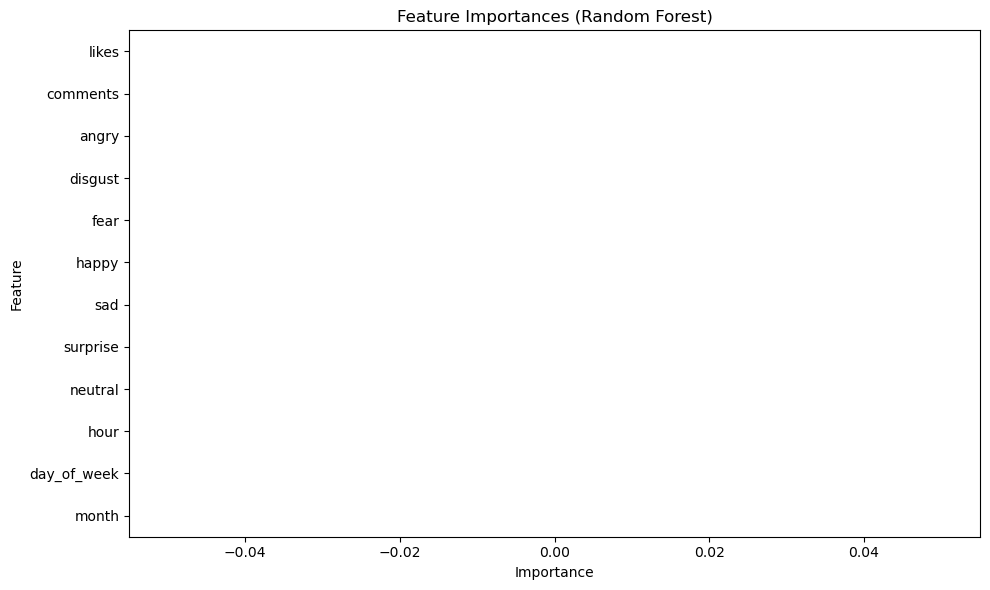

In [16]:
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for easier plotting
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print values
print(feat_imp_df)